# Exploratory Data Analysis for Test

### Importing all Important Libraries

In [3]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Connecting To a DataBase

In [5]:
conn = sql.connect('score.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", tables)

Tables: [('score',)]


### Importing The dataset into dataframe from the table

In [7]:
df = pd.read_sql_query("SELECT * FROM score", conn)
print(df.sample(5))

       index  number_of_siblings direct_admission     CCA learning_style  \
14292  14292                   0              Yes  Sports       Auditory   
10239  10239                   0              Yes    Arts         Visual   
10175  10175                   0               No    None         Visual   
3579    3579                   1              Yes    None         Visual   
14171  14171                   0               No  Sports       Auditory   

      student_id  gender tuition  final_test  n_male  n_female   age  \
14292     35JUPP  Female      No        78.0    15.0       6.0  16.0   
10239     LBY24O  Female     Yes        79.0     5.0      13.0  16.0   
10175     CSWF1K  Female       Y        82.0    17.0       7.0  15.0   
3579      T5W6IR  Female     Yes        93.0     6.0      15.0  16.0   
14171     VJG508  Female      No        64.0     0.0      27.0  15.0   

       hours_per_week  attendance_rate sleep_time wake_time  \
14292             8.0             91.0      21:

### Exploring the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

In [10]:
df.describe()

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
count,15900.000000,15900.000000,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000
mean,7949.500000,0.886541,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268
std,4590.078975,0.751346,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230
min,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000
25%,3974.750000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000
50%,7949.500000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000
75%,11924.250000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000
max,15899.000000,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000


### Correcting the Dataset

In [12]:
df = df[(df['age'] > 0)]
df.drop(columns = ['index','bag_color','student_id','age','mode_of_transport'], inplace = True)
df.replace('None',np.nan, inplace = True)
df.replace('ARTS','Arts', inplace = True)
df.replace('CLUBS','Clubs', inplace = True)
df.replace('SPORTS','Sports', inplace = True)
df.replace('N','No', inplace = True)
df.replace('Y','Yes', inplace = True)

print("Data Frame After correcting values in dataset : \n", df)

Data Frame After correcting values in dataset : 
        number_of_siblings direct_admission     CCA learning_style  gender  \
0                       0              Yes  Sports         Visual  Female   
1                       2               No  Sports       Auditory  Female   
2                       0              Yes     NaN         Visual    Male   
3                       1               No   Clubs       Auditory  Female   
4                       0               No  Sports       Auditory    Male   
...                   ...              ...     ...            ...     ...   
15895                   1               No   Clubs         Visual  Female   
15896                   1              Yes     NaN       Auditory    Male   
15897                   1              Yes  Sports       Auditory  Female   
15898                   1               No   Clubs         Visual    Male   
15899                   2              Yes     NaN         Visual    Male   

      tuition  final_test

### Handling Null Values

In [14]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["attendance_rate"]] = median_imputer.fit_transform(df[["attendance_rate"]])
df['CCA'] = df['CCA'].fillna(df['CCA'].mode()[0])
df.dropna(subset = 'final_test', axis = 0, inplace = True)

In [15]:
print(df['tuition'].unique())

['No' 'Yes']


### Data Exploration with Visuals

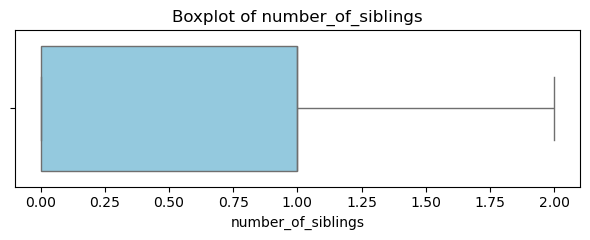

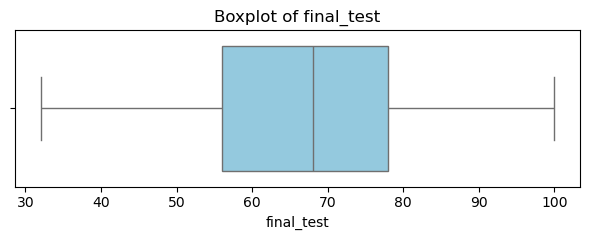

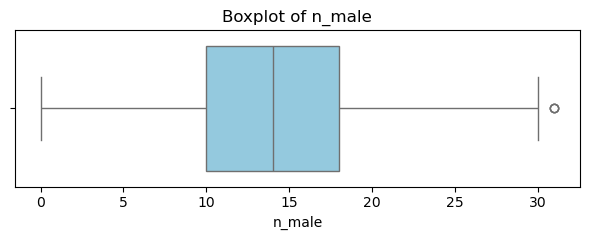

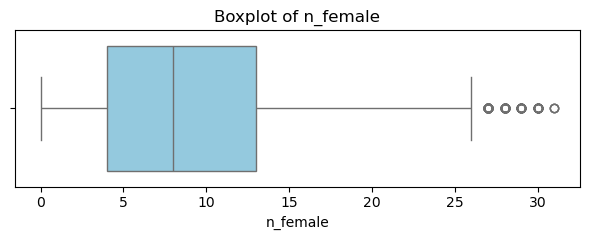

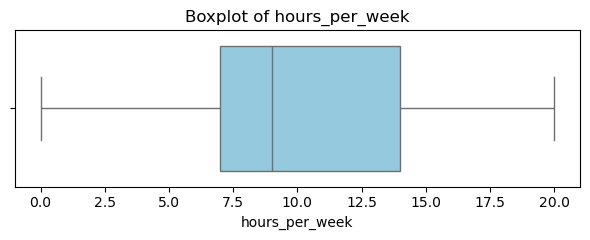

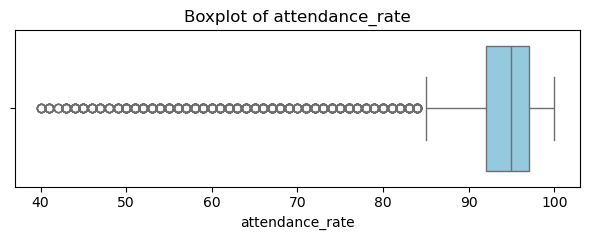

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

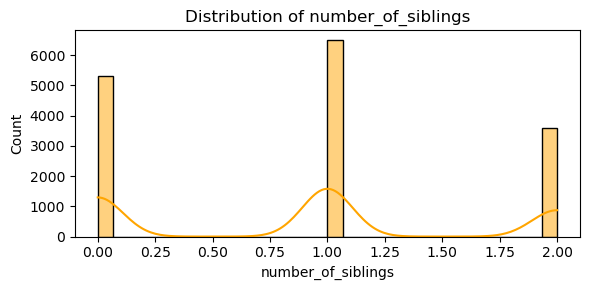

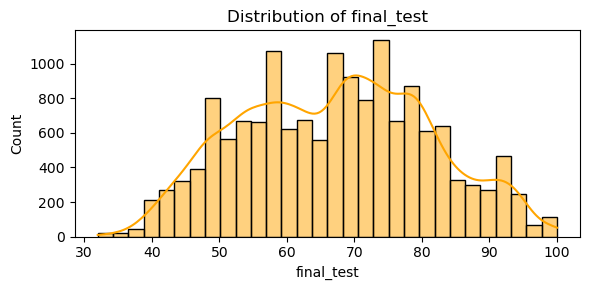

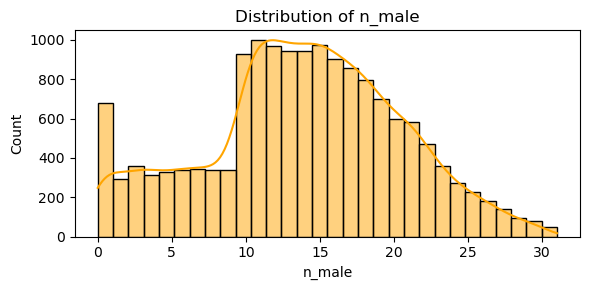

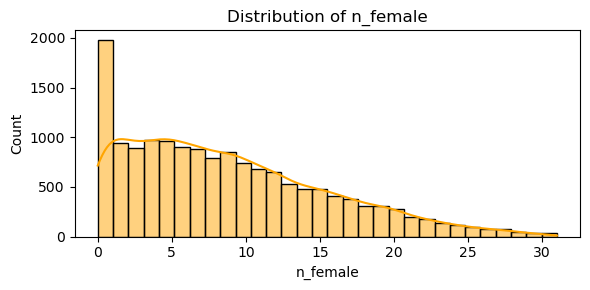

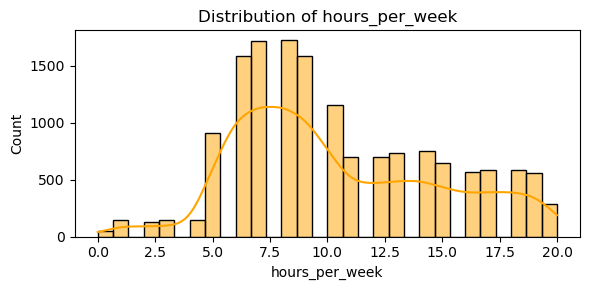

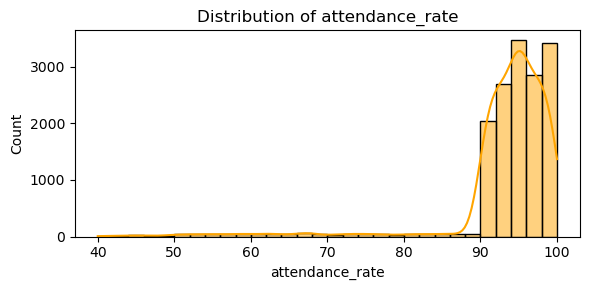

In [18]:
# Histogram or KDE plot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

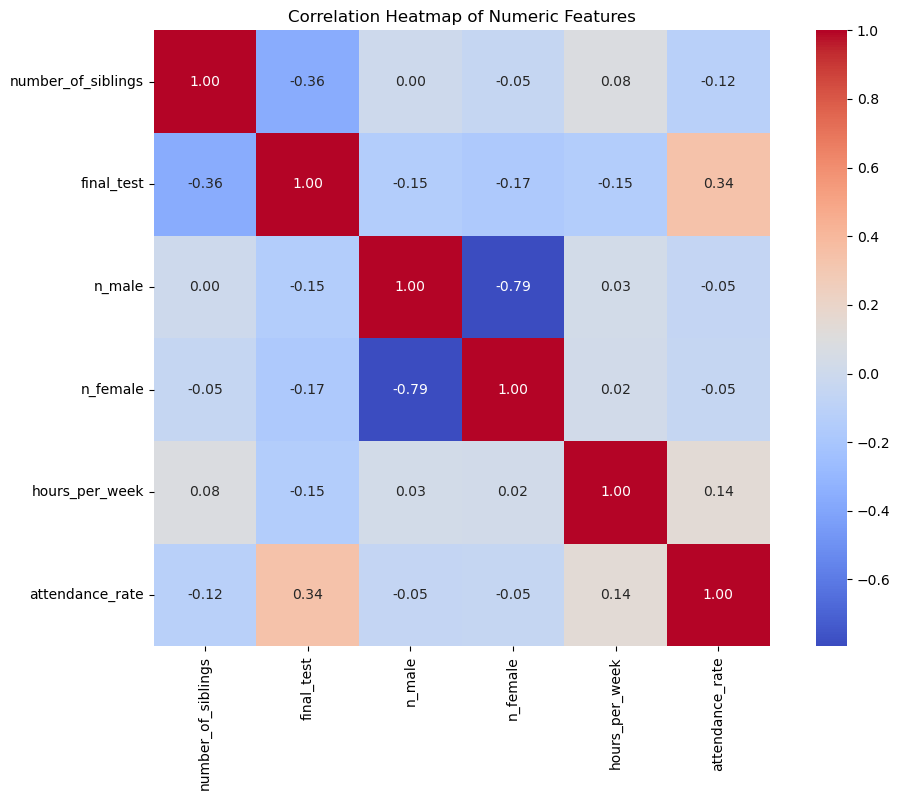

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Creating Important Columns and Removing Redundant Columns

In [21]:
df['sleep_time'] = pd.to_datetime(df['sleep_time'], format='%H:%M')
df['wake_time'] = pd.to_datetime(df['wake_time'], format='%H:%M')

# # Create Total Hours Slept
df['total_sleep_hours'] = (df['wake_time'] - df['sleep_time']).dt.total_seconds() / 3600
df['total_sleep_hours'] = df['total_sleep_hours'].apply(lambda x: x + 24 if x < 0 else x)

# Drop original columns
df.drop(['sleep_time', 'wake_time'], axis=1, inplace=True)

In [22]:
# Create study_efficiency
df['study_efficiency'] = df['hours_per_week'] * df['attendance_rate']
df.drop(['hours_per_week'], axis=1, inplace=True)

In [23]:
# Create total_students
df['total_students'] = df['n_male'] + df['n_female']
df.drop(['n_male', 'n_female'], axis=1, inplace=True)

In [24]:
# Create Healthy Routine Score
df['healthy_routine_score'] = df['total_sleep_hours'] * df['attendance_rate']
df.drop(columns = ['total_sleep_hours','attendance_rate'], inplace = True)

### Encoding Categorical Data to Numerical Data

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Columns to One-Hot Encode
onehot_cols = ['CCA', 'gender', 'direct_admission', 'tuition', 'learning_style']

# Create the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)

# Apply the transformation
df_encoded = ct.fit_transform(df)

# Get all feature names 
feature_names = ct.get_feature_names_out()

# Convert to DataFrame
df = pd.DataFrame(df_encoded, columns=feature_names)

# Clean up column names (optional)
df.columns = df.columns.str.replace('onehot__', '').str.replace('remainder__', '')

In [27]:
df.columns

Index(['CCA_Clubs', 'CCA_NONE', 'CCA_Sports', 'gender_Male',
       'direct_admission_Yes', 'tuition_Yes', 'learning_style_Visual',
       'number_of_siblings', 'final_test', 'study_efficiency',
       'total_students', 'healthy_routine_score'],
      dtype='object')

### Separating Features(X) and Target(y)

In [29]:
X = df.drop('final_test', axis=1)
y = df['final_test']
print(X)
print('\n')
print(y)

       CCA_Clubs  CCA_NONE  CCA_Sports  gender_Male  direct_admission_Yes  \
0            0.0       0.0         1.0          0.0                   1.0   
1            0.0       0.0         1.0          0.0                   0.0   
2            1.0       0.0         0.0          1.0                   1.0   
3            1.0       0.0         0.0          0.0                   0.0   
4            0.0       0.0         1.0          1.0                   0.0   
...          ...       ...         ...          ...                   ...   
15395        1.0       0.0         0.0          0.0                   0.0   
15396        1.0       0.0         0.0          1.0                   1.0   
15397        0.0       0.0         1.0          0.0                   1.0   
15398        1.0       0.0         0.0          1.0                   0.0   
15399        1.0       0.0         0.0          1.0                   1.0   

       tuition_Yes  learning_style_Visual  number_of_siblings  \
0         

### Splitting the data into Training And Test Set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standarising the data

In [33]:
from sklearn.preprocessing import StandardScaler

continuous_cols = ['healthy_routine_score', 'total_students', 'number_of_siblings', 'study_efficiency']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [34]:
print(X_train_scaled)
print('\n')
print(X_test_scaled)

       CCA_Clubs  CCA_NONE  CCA_Sports  gender_Male  direct_admission_Yes  \
424          1.0       0.0         0.0          1.0                   0.0   
554          0.0       0.0         0.0          0.0                   0.0   
2992         1.0       0.0         0.0          0.0                   0.0   
1954         0.0       0.0         0.0          0.0                   0.0   
13886        0.0       0.0         1.0          1.0                   0.0   
...          ...       ...         ...          ...                   ...   
5191         0.0       0.0         1.0          0.0                   0.0   
13418        0.0       0.0         0.0          0.0                   0.0   
5390         1.0       0.0         0.0          0.0                   1.0   
860          0.0       0.0         1.0          1.0                   1.0   
7270         1.0       0.0         0.0          0.0                   0.0   

       tuition_Yes  learning_style_Visual  number_of_siblings  \
424       

### Multiple Linear Regression

#### Train the Model

In [37]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([57.55780433, 74.68524263, 62.52050596, ..., 72.803197  ,
       74.57043038, 63.37086085])

#### Evaluate The Result

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(" Evaluation Metrics for Multiple Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE     :", mean_squared_error(y_test, y_pred_lr))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE     :", mean_absolute_error(y_test, y_pred_lr))

 Evaluation Metrics for Multiple Linear Regression:
R² Score: 0.5605060674872309
MSE     : 84.99048224261044
RMSE    : 9.219028269975661
MAE     : 7.408589311155428


#### Visualising the result

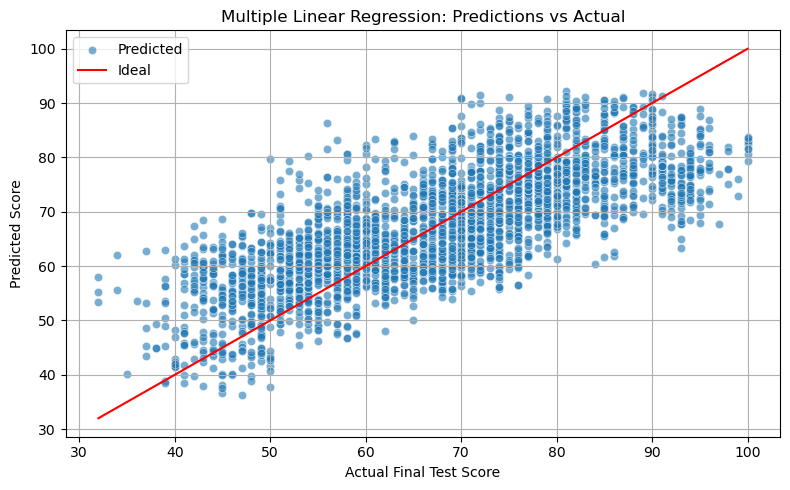

In [41]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, label="Predicted")
    sns.lineplot(x=y_true, y=y_true, color='red', label="Ideal")
    plt.xlabel("Actual Final Test Score")
    plt.ylabel("Predicted Score")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred_lr, "Multiple Linear Regression: Predictions vs Actual")

### Polynomial Regression

#### Train the Model

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_poly

array([58.83898962, 80.34862781, 53.92276299, ..., 75.20817912,
       76.2362957 , 64.91370428])

#### Evaluate The Results

In [46]:
print("Evaluation Metrics for Polynomial Regression:")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE     :", mean_squared_error(y_test, y_pred_poly))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("MAE     :", mean_absolute_error(y_test, y_pred_poly))

Evaluation Metrics for Polynomial Regression:
R² Score: 0.7171414865255068
MSE     : 54.69991662723726
RMSE    : 7.395939198454599
MAE     : 5.69416232693505


#### Visualising the result

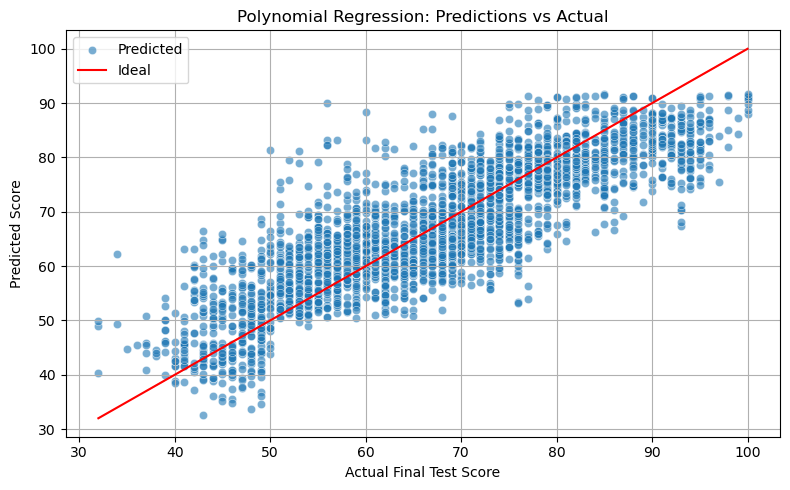

In [48]:
plot_predictions(y_test, y_pred_poly, "Polynomial Regression: Predictions vs Actual")

### Support Vector Regression

#### Train The Model

In [51]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_svr

array([54.20308789, 82.24356724, 61.52006563, ..., 72.46414161,
       73.7587258 , 66.51855407])

#### Evaluate The Results

In [53]:
print("Evaluation Metrics for SVR:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MSE     :", mean_squared_error(y_test, y_pred_svr))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("MAE     :", mean_absolute_error(y_test, y_pred_svr))

Evaluation Metrics for SVR:
R² Score: 0.7201179603826513
MSE     : 54.12431835434439
RMSE    : 7.356923158110623
MAE     : 5.508320602697573


#### Visualising The Results

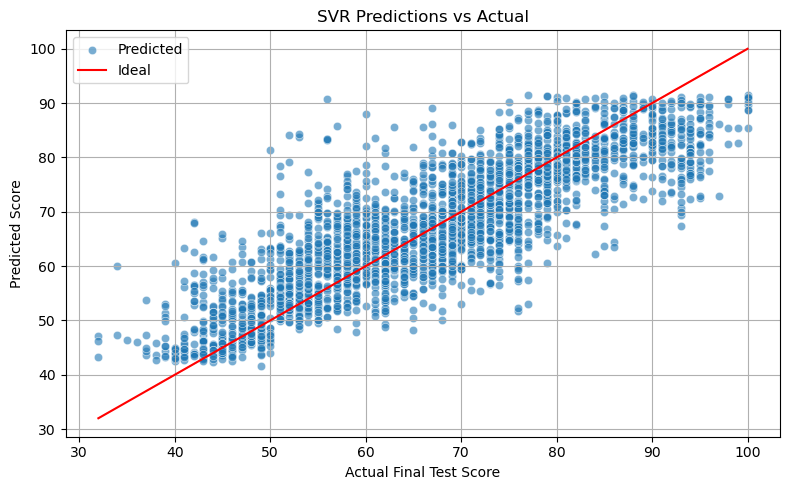

In [55]:
plot_predictions(y_test, y_pred_svr, "SVR Predictions vs Actual")

### Ridge Regression

#### Train The Model

In [58]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

y_pred_ridge = ridge_model.predict(X_test_poly)
y_pred_ridge

array([58.78098805, 80.31531926, 54.00455653, ..., 75.17583292,
       76.19277044, 64.8820734 ])

#### Evaluate The Results

In [60]:
print(" Evaluation Metrics for Ridge Regression:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MSE     :", mean_squared_error(y_test, y_pred_ridge))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE     :", mean_absolute_error(y_test, y_pred_ridge))

 Evaluation Metrics for Ridge Regression:
R² Score: 0.717590202705809
MSE     : 54.61314272267866
RMSE    : 7.390070549235553
MAE     : 5.69088329705993


#### Visualising The Results

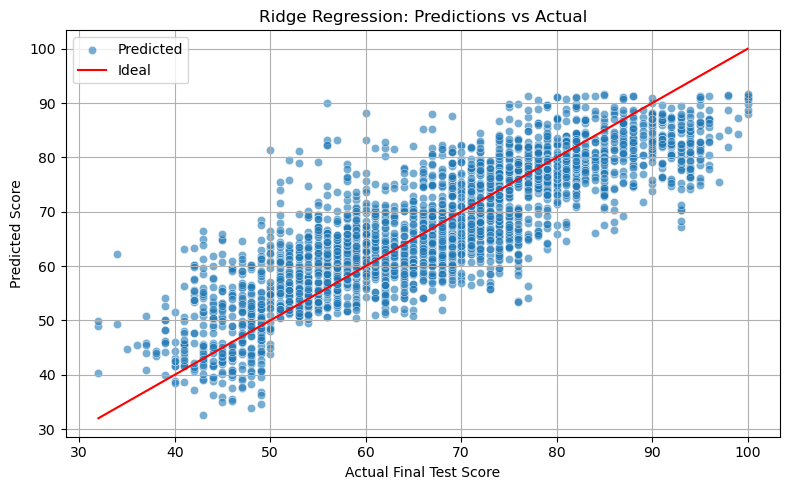

In [62]:
plot_predictions(y_test, y_pred_ridge, "Ridge Regression: Predictions vs Actual")

### Lasso Regression

#### Train The Model

In [65]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.005, max_iter = 10000)
lasso_model.fit(X_train_poly, y_train)

y_pred_lasso = lasso_model.predict(X_test_poly)
y_pred_lasso

array([57.97497956, 79.86959985, 55.69630729, ..., 74.85851058,
       75.79258804, 65.32859977])

#### Evaluate The Results

In [67]:
print(" Evaluation Metrics for Lasso Regression:")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MSE     :", mean_squared_error(y_test, y_pred_lasso))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE     :", mean_absolute_error(y_test, y_pred_lasso))

 Evaluation Metrics for Lasso Regression:
R² Score: 0.7185551177673811
MSE     : 54.42654493294969
RMSE    : 7.377434847760411
MAE     : 5.687684391155478


#### Visualising The Result

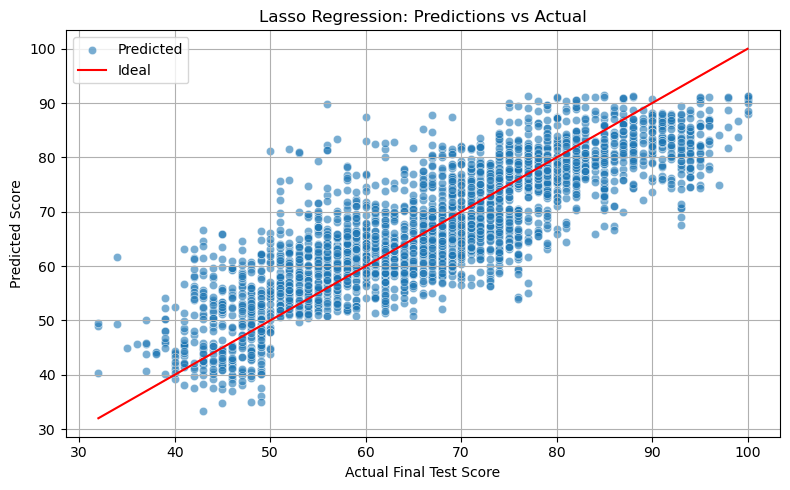

In [69]:
plot_predictions(y_test, y_pred_lasso, "Lasso Regression: Predictions vs Actual")

### Decision Tree Regression

#### Train The Model

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 10, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_dt

array([49.52197802, 84.375     , 52.27173913, ..., 76.61057692,
       73.20754717, 68.8       ])

#### Evaluate The Results

In [74]:
print(" Evaluation Metrics for Decision Tree Regression:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MSE     :", mean_squared_error(y_test, y_pred_dt))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE     :", mean_absolute_error(y_test, y_pred_dt))

 Evaluation Metrics for Decision Tree Regression:
R² Score: 0.8306877694088688
MSE     : 32.742040476506965
RMSE    : 5.722066102074229
MAE     : 3.86661339946057


#### Visualisng the Result

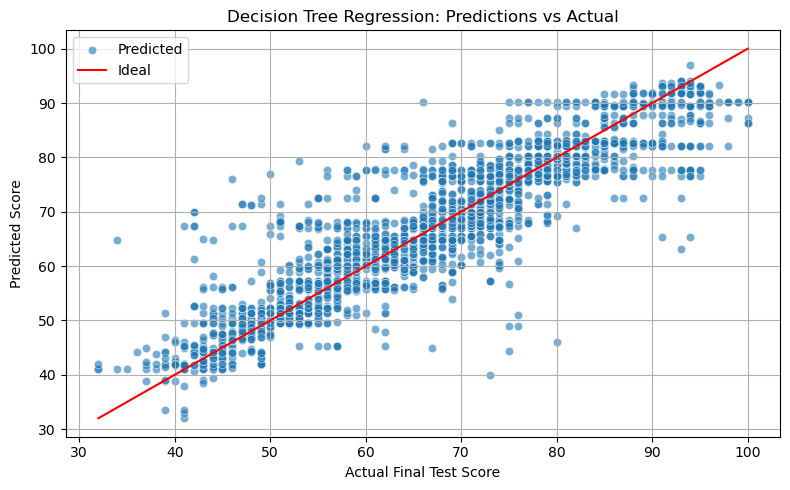

In [76]:
plot_predictions(y_test, y_pred_dt, "Decision Tree Regression: Predictions vs Actual")

### Random Forest Regression

#### Train the Model

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth = 10, n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf

array([49.75682777, 83.2510207 , 53.1574973 , ..., 74.93952836,
       73.38460765, 69.45212806])

#### Evaluate The Results

In [81]:
print(" Evaluation Metrics for Random Forest Regression:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE     :", mean_squared_error(y_test, y_pred_rf))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE     :", mean_absolute_error(y_test, y_pred_rf))

 Evaluation Metrics for Random Forest Regression:
R² Score: 0.8539568717109364
MSE     : 28.242200820704884
RMSE    : 5.314339170649996
MAE     : 3.668068526050017


#### Visualising the results

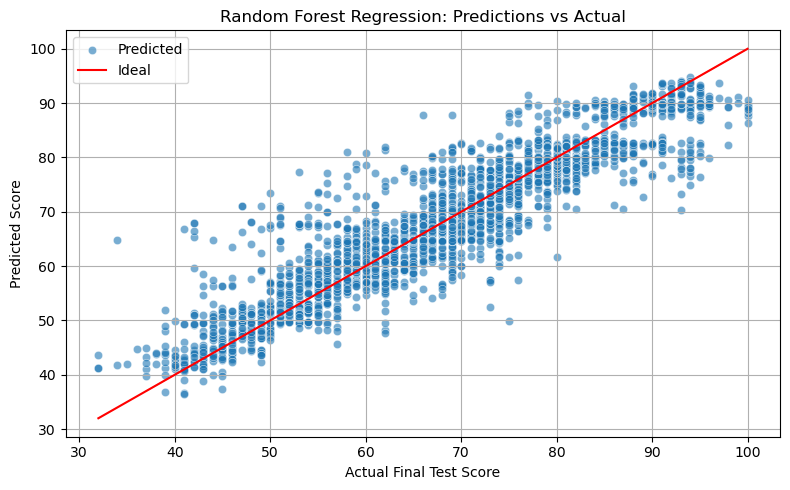

In [83]:
plot_predictions(y_test, y_pred_rf, "Random Forest Regression: Predictions vs Actual")

### Cross Validation

#### Importing Necessary Libraries

In [86]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
import numpy as np

#### Cross Validation Setup

In [88]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

#### Multiple Linear Regression

In [90]:
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring=scorer)

print("Linear Regression:")
print("Mean R² Score:", np.mean(lr_scores))
print("Std Dev:", np.std(lr_scores))

Linear Regression:
Mean R² Score: 0.5478894469372311
Std Dev: 0.01593616567526193


#### Polynomial Regression

In [92]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

poly_model = LinearRegression()
poly_scores = cross_val_score(poly_model, X_train_poly, y_train, cv=cv, scoring=scorer)

print("Polynomial Regression (degree=3):")
print("Mean R² Score:", np.mean(poly_scores))
print("Std Dev:", np.std(poly_scores))

Polynomial Regression (degree=3):
Mean R² Score: 0.7007835255204616
Std Dev: 0.014001639440333821


#### Kernel SVM

In [94]:
svm_model = SVR(kernel='rbf')
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=cv, scoring=scorer)

print("Kernel SVM:")
print("Mean R² Score:", np.mean(svm_scores))
print("Std Dev:", np.std(svm_scores))

Kernel SVM:
Mean R² Score: 0.7031974722762202
Std Dev: 0.016658522567819755


#### Ridge Regession

In [96]:
ridge_model = Ridge(alpha= 1.0)
ridge_scores = cross_val_score(ridge_model, X_train_poly, y_train, cv=cv, scoring=scorer)

print("Ridge Regression:")
print("Mean R² Score:", np.mean(ridge_scores))
print("Std Dev:", np.std(ridge_scores))

Ridge Regression:
Mean R² Score: 0.7019628021861515
Std Dev: 0.013120314612197901


#### Lasso Regression

In [98]:
lasso_model = Lasso(alpha=0.005, max_iter = 10000)
lasso_scores = cross_val_score(lasso_model, X_train_poly, y_train, cv=cv, scoring=scorer)

print("Lasso Regression:")
print("Mean R² Score:", np.mean(lasso_scores))
print("Std Dev:", np.std(lasso_scores))

Lasso Regression:
Mean R² Score: 0.7028477899300245
Std Dev: 0.013254307217033532


#### Decision Tree Regression

In [100]:
dt_model = DecisionTreeRegressor(max_depth = 10,random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=cv, scoring=scorer)

print("Decision Tree:")
print("Mean R² Score:", np.mean(dt_scores))
print("Std Dev:", np.std(dt_scores))

Decision Tree:
Mean R² Score: 0.8297057926916425
Std Dev: 0.017476541660040274


#### Random Forest Regression

In [102]:
rf_model = RandomForestRegressor(max_depth = 10, n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring=scorer)

print("Random Forest:")
print("Mean R² Score:", np.mean(rf_scores))
print("Std Dev:", np.std(rf_scores))

Random Forest:
Mean R² Score: 0.8495618347383308
Std Dev: 0.011271552909476658


### Bagging Regression

#### Train The Model

In [105]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth = 10),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_model.fit(X_train_scaled, y_train)

y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_bagging

array([49.75682777, 83.2210207 , 53.1574973 , ..., 74.96152836,
       73.41044099, 69.47812806])

#### Evaluating the Results

In [107]:
print(" Evaluation Metrics for Bagging Regressor:")
print("R² Score:", r2_score(y_test, y_pred_bagging))
print("MSE     :", mean_squared_error(y_test, y_pred_bagging))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_bagging)))
print("MAE     :", mean_absolute_error(y_test, y_pred_bagging))

 Evaluation Metrics for Bagging Regressor:
R² Score: 0.8541749075413396
MSE     : 28.200036483495044
RMSE    : 5.31037065405938
MAE     : 3.6682862659439093


#### Visualising the Result

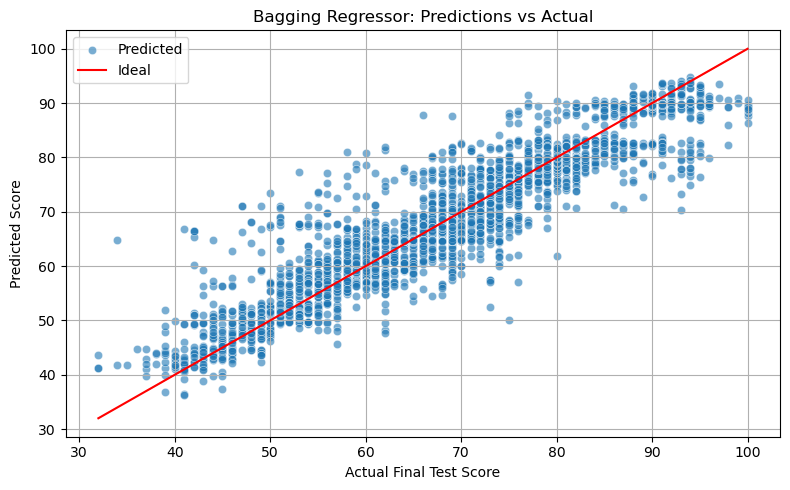

In [109]:
plot_predictions(y_test, y_pred_bagging, "Bagging Regressor: Predictions vs Actual")

### Boosting Regressions

### AdaBoost Regression

#### Train The Model

In [113]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=10),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_train_scaled, y_train)

y_pred_ada = ada_model.predict(X_test_scaled)
y_pred_ada

array([49.83333333, 83.22222222, 52.91891892, ..., 76.80851064,
       73.        , 69.85714286])

#### Evaluate The Results

In [115]:
print("Evaluation Metrics for AdaBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_ada))
print("MSE     :", mean_squared_error(y_test, y_pred_ada))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_ada)))
print("MAE     :", mean_absolute_error(y_test, y_pred_ada))

Evaluation Metrics for AdaBoost Regressor:
R² Score: 0.8507365446312349
MSE     : 28.864956065397163
RMSE    : 5.372611661510365
MAE     : 3.7664731526609097


#### Visualising The Result

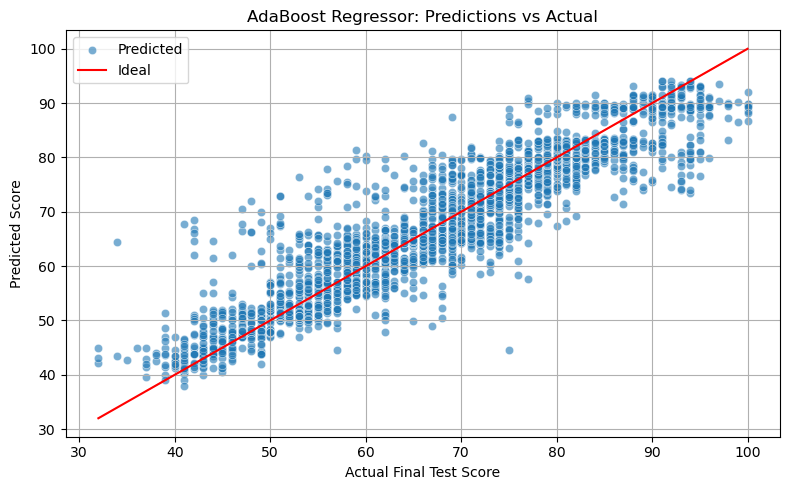

In [117]:
plot_predictions(y_test, y_pred_ada, "AdaBoost Regressor: Predictions vs Actual")

### Gradient Boosting Regression

#### Train the Model

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)
gbr_model.fit(X_train_scaled, y_train)

y_pred_gbr = gbr_model.predict(X_test_scaled)
y_pred_gbr

array([49.01562514, 84.33835421, 55.12135786, ..., 68.3260368 ,
       73.71220004, 71.52485641])

#### Evaluate The Results

In [122]:
print(" Evaluation Metrics for Gradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MSE     :", mean_squared_error(y_test, y_pred_gbr))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("MAE     :", mean_absolute_error(y_test, y_pred_gbr))

 Evaluation Metrics for Gradient Boosting Regressor:
R² Score: 0.8371745651932327
MSE     : 31.487606999415874
RMSE    : 5.611381915305344
MAE     : 3.7994666377777437


#### Visualising The Result

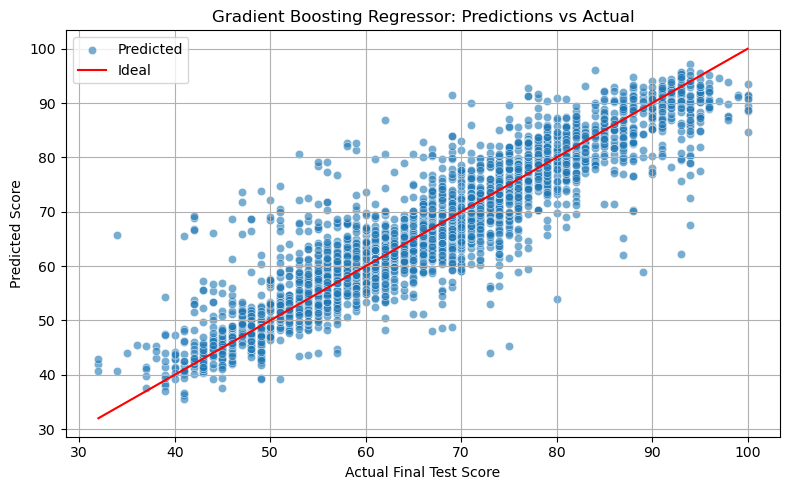

In [124]:
plot_predictions(y_test, y_pred_gbr, "Gradient Boosting Regressor: Predictions vs Actual")

In [125]:
pip install xgboost

### XGBoost Regression

#### Train the Model

In [128]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_xgb

array([49.064766, 84.46837 , 54.22585 , ..., 70.50835 , 74.07558 ,
       70.411194], dtype=float32)

#### Evaluate The Results

In [130]:
print("Evaluation Metrics for XGBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MSE     :", mean_squared_error(y_test, y_pred_xgb))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE     :", mean_absolute_error(y_test, y_pred_xgb))

Evaluation Metrics for XGBoost Regressor:
R² Score: 0.8447887684840052
MSE     : 30.015152520064845
RMSE    : 5.4786086299410774
MAE     : 3.7136165829447956


#### Visualising The Result

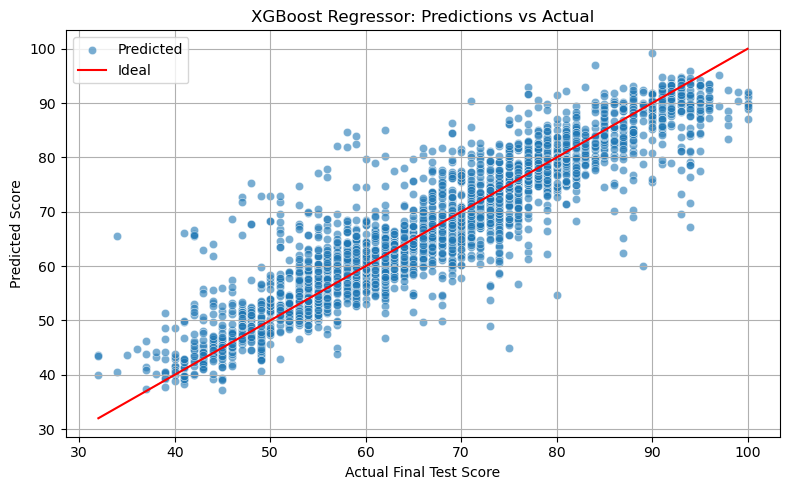

In [132]:
plot_predictions(y_test, y_pred_xgb, "XGBoost Regressor: Predictions vs Actual")

### Model Comparison and Selection

Model Performance Comparison:


,Model,R² Score,RMSE,MSE,MAE
0,Bagging Regressor,0.854175,5.310371,28.200036,3.668286
1,Random Forest Regression,0.853957,5.314339,28.242201,3.668069
2,AdaBoost Regressor,0.850737,5.372612,28.864956,3.766473
3,XG Boosting,0.844789,5.478609,30.015153,3.713617
4,Gradient Boosting,0.837175,5.611382,31.487607,3.799467
5,Decision Tree Regression,0.830688,5.722066,32.742040,3.866613
6,SVR,0.720118,7.356923,54.124318,5.508321
7,Lasso Regression,0.718555,7.377435,54.426545,5.687684
8,Ridge Regression,0.717590,7.390071,54.613143,5.690883
9,Polynomial Regression,0.717141,7.395939,54.699917,5.694162


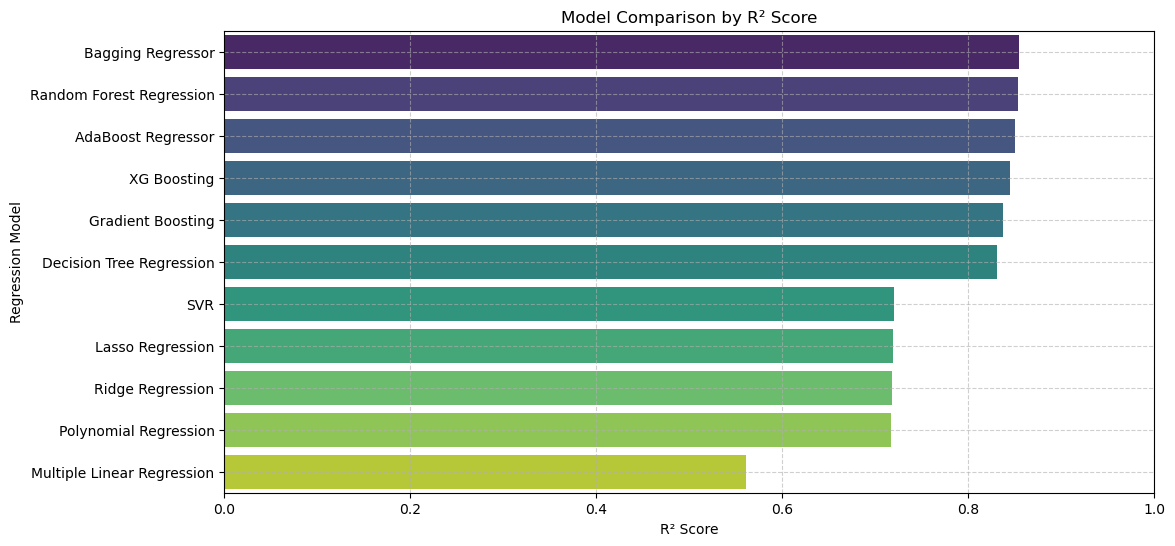

Best Model: Bagging Regressor
R² Score : 0.8542
MAE      : 3.6683
MSE      : 28.2000
RMSE     : 5.3104


In [134]:
models = {
    "Multiple Linear Regression": y_pred_lr,
    "Polynomial Regression": y_pred_poly,
    "SVR": y_pred_svr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree Regression": y_pred_dt,
    "Random Forest Regression": y_pred_rf,
    "Bagging Regressor": y_pred_bagging,
    "AdaBoost Regressor": y_pred_ada,
    "Gradient Boosting": y_pred_gbr,
    "XG Boosting": y_pred_xgb
}

results = []
for name, preds in models.items():
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    results.append({
        "Model": name,
        "R² Score": r2,
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae
    })

results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False).reset_index(drop=True)

# Display model comparison table
print("Model Performance Comparison:")
display(results_df)

# Visualize model performance using R² Score
plt.figure(figsize=(12, 6))
sns.barplot(x='R² Score', y='Model', data=results_df, hue = 'Model', palette='viridis')
plt.title('Model Comparison by R² Score')
plt.xlabel('R² Score')
plt.ylabel('Regression Model')
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Identify the best model
best_model = results_df.iloc[0]
best_model_name = best_model["Model"]
best_predictions = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"R² Score : {best_model['R² Score']:.4f}")
print(f"MAE      : {best_model['MAE']:.4f}")
print(f"MSE      : {best_model['MSE']:.4f}")
print(f"RMSE     : {best_model['RMSE']:.4f}")

In [136]:
if cursor:
    cursor.close()

In [140]:
if conn:
    conn.close()